In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')
%matplotlib inline

# Finding patterns in the data
In this notebook we will try to extract words that have nice time series.

In [2]:
wordYear = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
print('Shape : ',wordYear.shape)
wordYear.head()

Shape :  (197, 45149)


,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarcorp,aarg,...,œcuménique,œcuménisme,œdipe,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre
1798-01-01,0.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0
1799-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,6.0
1804-01-01,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,18.0
1805-01-01,0.0,4.0,9.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,16.0
1806-01-01,3.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,26.0


We also have to keep the data until 1997, because for 1998 we only have too months.

In [3]:
wordYear = wordYear.loc[wordYear.index[:-1]]
wordYear.shape

(196, 45149)

First we will keep only time series that have sufficient datapoints to create smooth functions from which to choose interesting ones. If we analyze sparse time series, we will get results that are not consistent  with what we are looking for.

In [4]:
numOccurences = wordYear.astype(bool).sum(axis=0).values

In [5]:
fullYear = wordYear[wordYear.columns[numOccurences>40]]
index = fullYear.index
fullYear.shape

(196, 12850)

We also have to be working in normalized data so that we can identify increase in usage.

In [6]:
fullYear = fullYear.divide(fullYear.sum(axis=1).values,axis=0)

And we will also smooth the data.

In [7]:
fullYear.head()

,aarau,abaisser,abandon,abandonnant,abandonnent,abandonner,abattoir,abattre,abattue,abba,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
1798-01-01,0.0,0.0,0.000028,0.000000,0.000012,0.000158,0.0,0.000016,0.000000,0.0,...,0.0,0.0,0.007822,0.000041,0.000041,0.0,0.0,0.000041,0.000000,0.000016
1799-01-01,0.0,0.0,0.000009,0.000019,0.000000,0.000385,0.0,0.000012,0.000022,0.0,...,0.0,0.0,0.007117,0.000428,0.000012,0.0,0.0,0.000050,0.000000,0.000019
1804-01-01,0.0,0.0,0.000014,0.000000,0.000000,0.000142,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.006100,0.000375,0.000000,0.0,0.0,0.000052,0.000007,0.000063
1805-01-01,0.0,0.0,0.000018,0.000000,0.000000,0.000187,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.005909,0.000441,0.000009,0.0,0.0,0.000018,0.000000,0.000047
1806-01-01,0.0,0.0,0.000000,0.000000,0.000000,0.000110,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.006163,0.000509,0.000000,0.0,0.0,0.000107,0.000000,0.000075


In [8]:
fullYear = fullYear.rolling(window=3).mean()

### Finding increasing time series
To find a time serie that increases over time we will compte the gradient of each function and pick the words for which the gradient is maximum.

In [56]:
totGrad = fullYear.apply(np.gradient).sum()

In [57]:
wordsIncrease = totGrad.sort_values(ascending=False).index[0:15]

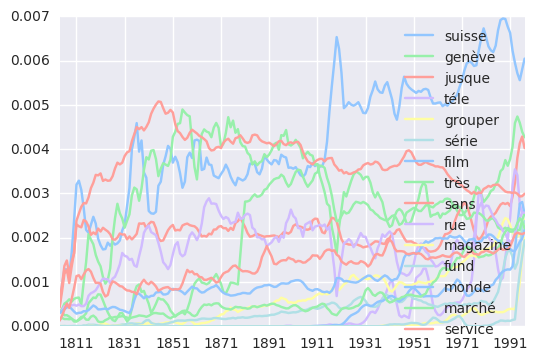

In [58]:
for i in wordsIncrease:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

### Finding decreasing time series
For this we will do the same thing but the other way round.

In [59]:
wordsDecrease = totGrad.sort_values().index[0:15]

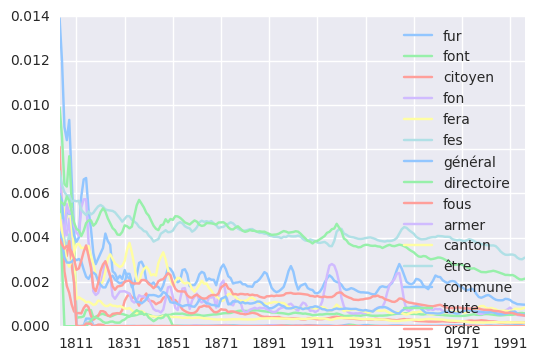

In [60]:
for i in wordsDecrease:
    plt.plot_date(index,fullYear[i].values,'-',label=i)
plt.legend()

### Finding correlated time series

In [6]:
fullYear.fillna(0,inplace=True)
fullYearNorm = fullYear.divide(fullYear.sum(axis=1),axis=0)

/Users/thomas/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [7]:
covMatrix = fullYearNorm.cov()

In [8]:
wordOfInterest = (covMatrix > 0.2).sum(axis=1)

In [9]:
fullYear.index[wordOfInterest > 2]

/Users/thomas/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1434: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 196 but corresponding boolean dimension is 12850
  result = getitem(key)


Index([], dtype='object')

In [10]:
covMatrix.head()

,aarau,abaisser,abandon,abandonnant,abandonnent,abandonner,abattoir,abattre,abattue,abba,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
aarau,5.192284e-10,7.310474e-11,1.077068e-10,-4.182900e-11,-1.375873e-11,-6.878638e-11,1.788317e-11,-2.528398e-11,-3.814508e-11,-3.602977e-12,...,-6.412416e-11,-2.250294e-12,-5.218365e-09,-1.537610e-09,-5.288785e-11,-3.564007e-12,-2.714771e-11,3.437741e-10,4.370533e-11,4.644252e-09
abaisser,7.310474e-11,1.537203e-10,4.453689e-11,-6.860294e-12,-3.899827e-13,4.333640e-11,-4.339794e-13,-1.034198e-11,-1.892331e-10,-6.371098e-12,...,9.883137e-11,2.479836e-12,-7.431629e-10,-4.010957e-10,-6.726735e-13,1.064528e-11,-3.210705e-11,1.358026e-10,1.665421e-11,1.669313e-10
abandon,1.077068e-10,4.453689e-11,3.908574e-10,-4.057188e-11,-6.954577e-12,-2.607166e-10,-6.006763e-12,-1.805521e-12,1.442721e-11,1.530351e-11,...,-9.069164e-11,4.427339e-12,-7.528868e-09,-1.867894e-09,-3.677372e-11,-1.561942e-11,2.380046e-10,3.285888e-10,9.308486e-11,4.680692e-09
abandonnant,-4.182900e-11,-6.860294e-12,-4.057188e-11,3.520410e-11,3.285488e-12,1.413890e-10,-3.052732e-12,8.476735e-12,2.172562e-11,-4.675925e-12,...,3.404295e-11,-1.828506e-13,1.474375e-09,3.170502e-10,7.996610e-12,-2.413712e-12,-3.598215e-11,-9.087266e-11,-2.220671e-11,-1.213215e-09
abandonnent,-1.375873e-11,-3.899827e-13,-6.954577e-12,3.285488e-12,7.001636e-12,8.906464e-12,-7.044853e-13,2.023281e-12,-3.917590e-12,-3.082239e-13,...,2.356213e-12,1.700844e-13,3.726100e-10,3.021270e-11,7.093194e-12,-6.629343e-13,-7.461751e-12,-2.363129e-11,-3.871066e-12,-2.425668e-10


In [11]:
np.corrcoef(fullYearNorm.aarau,fullYear.aarau)

array([[ 1.        ,  0.79999865],
       [ 0.79999865,  1.        ]])

In [12]:
PearsonCorr = fullYear.corr()
PearsonCorr.head()

,aarau,abaisser,abandon,abandonnant,abandonnent,abandonner,abattoir,abattre,abattue,abba,...,êlre,êtes-vous,être,île,ôter,ôtre,œcuménique,œil,œuf,œuvre
aarau,1.000000,0.444376,0.543565,0.005742,0.028549,0.689423,0.258570,0.047459,0.122201,0.104673,...,-0.170078,0.093790,0.677555,0.537657,-0.320733,-0.076102,0.282675,0.621550,0.400121,0.655375
abaisser,0.444376,1.000000,0.460603,-0.038284,0.180485,0.420279,-0.025023,-0.122301,-0.047628,0.038253,...,-0.101175,0.070883,0.494687,0.300330,-0.174304,0.024379,0.240142,0.435389,0.373624,0.439488
abandon,0.543565,0.460603,1.000000,-0.087260,0.083220,0.716310,0.066775,0.016621,0.183897,0.161091,...,-0.271310,0.101208,0.878118,0.552143,-0.295208,-0.177666,0.755366,0.876342,0.536819,0.874319
abandonnant,0.005742,-0.038284,-0.087260,1.000000,0.225668,0.149624,-0.111033,0.484283,0.300273,-0.027300,...,-0.027190,-0.053674,-0.016980,0.106266,-0.012090,-0.027880,-0.117355,-0.063575,-0.001375,-0.004674
abandonnent,0.028549,0.180485,0.083220,0.225668,1.000000,0.153387,-0.028731,0.170734,0.117159,0.081130,...,-0.133611,0.125643,0.132285,0.077308,-0.045566,-0.117175,-0.009406,0.057555,0.158477,0.180220


In [13]:
highPear = fullYear.columns[(PearsonCorr > 0.9).sum(axis=1)>10]

In [14]:
highPear

Index(['abandon', 'abandonner', 'abbott', 'abeille', 'aborder', 'aboutir',
       'abri', 'absence', 'absolue', 'absolument',
       ...
       'évidente', 'éviter', 'évolution', 'évolué', 'évoquer', 'évén',
       'événements', 'être', 'œil', 'œuvre'],
      dtype='object', length=3048)

In [23]:
wordInGroup = highPear[200]
otherWords = PearsonCorr.columns[PearsonCorr.loc[wordInGroup] > 0.92]

In [24]:
otherWords

Index(['absolue', 'appeler', 'assez', 'assister', 'auquel', 'aussitôt',
       'auxquelles', 'auxquels', 'caractère', 'chercher', 'chose',
       'considérable', 'croire', 'dehors', 'elle-même', 'espérer',
       'excellente', 'faites', 'heureu', 'laquelle', 'lequel', 'lieue',
       'malheureu', 'pouvait', 'procédé', 'reconnaître', 'remarquer',
       'remplacer', 'servir', 'sujet', 'torte', 'voulue', 'vue'],
      dtype='object')

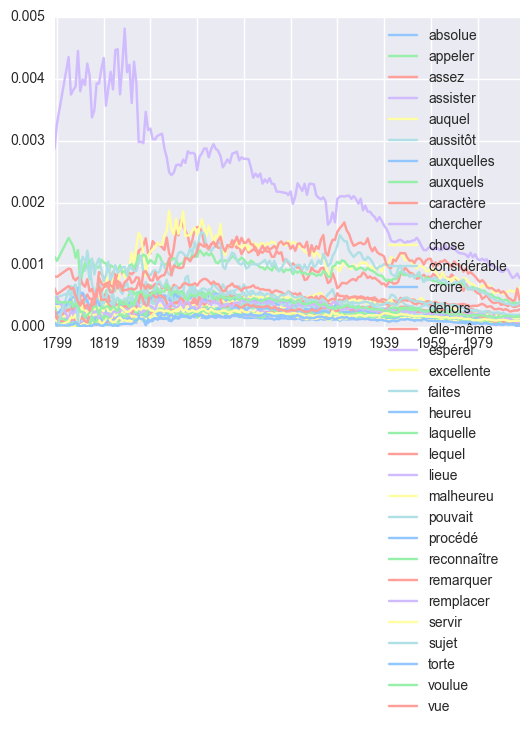

In [25]:
for i in otherWords:
    plt.plot_date(index,fullYearNorm[i].values,'-',
            label=i)

plt.legend()

### All the most present words


In [28]:
maxWords = fullYearNorm.sum(axis=0).sort_values(ascending=False).index[0:15]

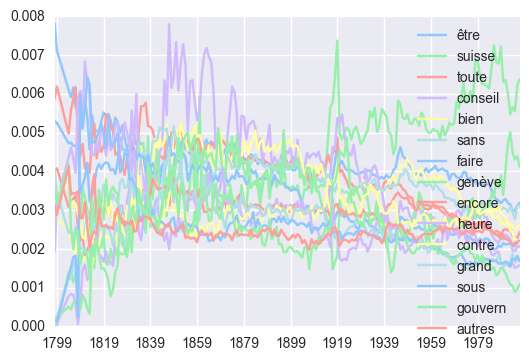

In [29]:
for maximum in maxWords:
    plt.plot_date(index,fullYearNorm[maximum].values,'-',label=maximum)

plt.legend()

### Dendogram Clustering

In [30]:
import scipy.cluster.hierarchy as hac

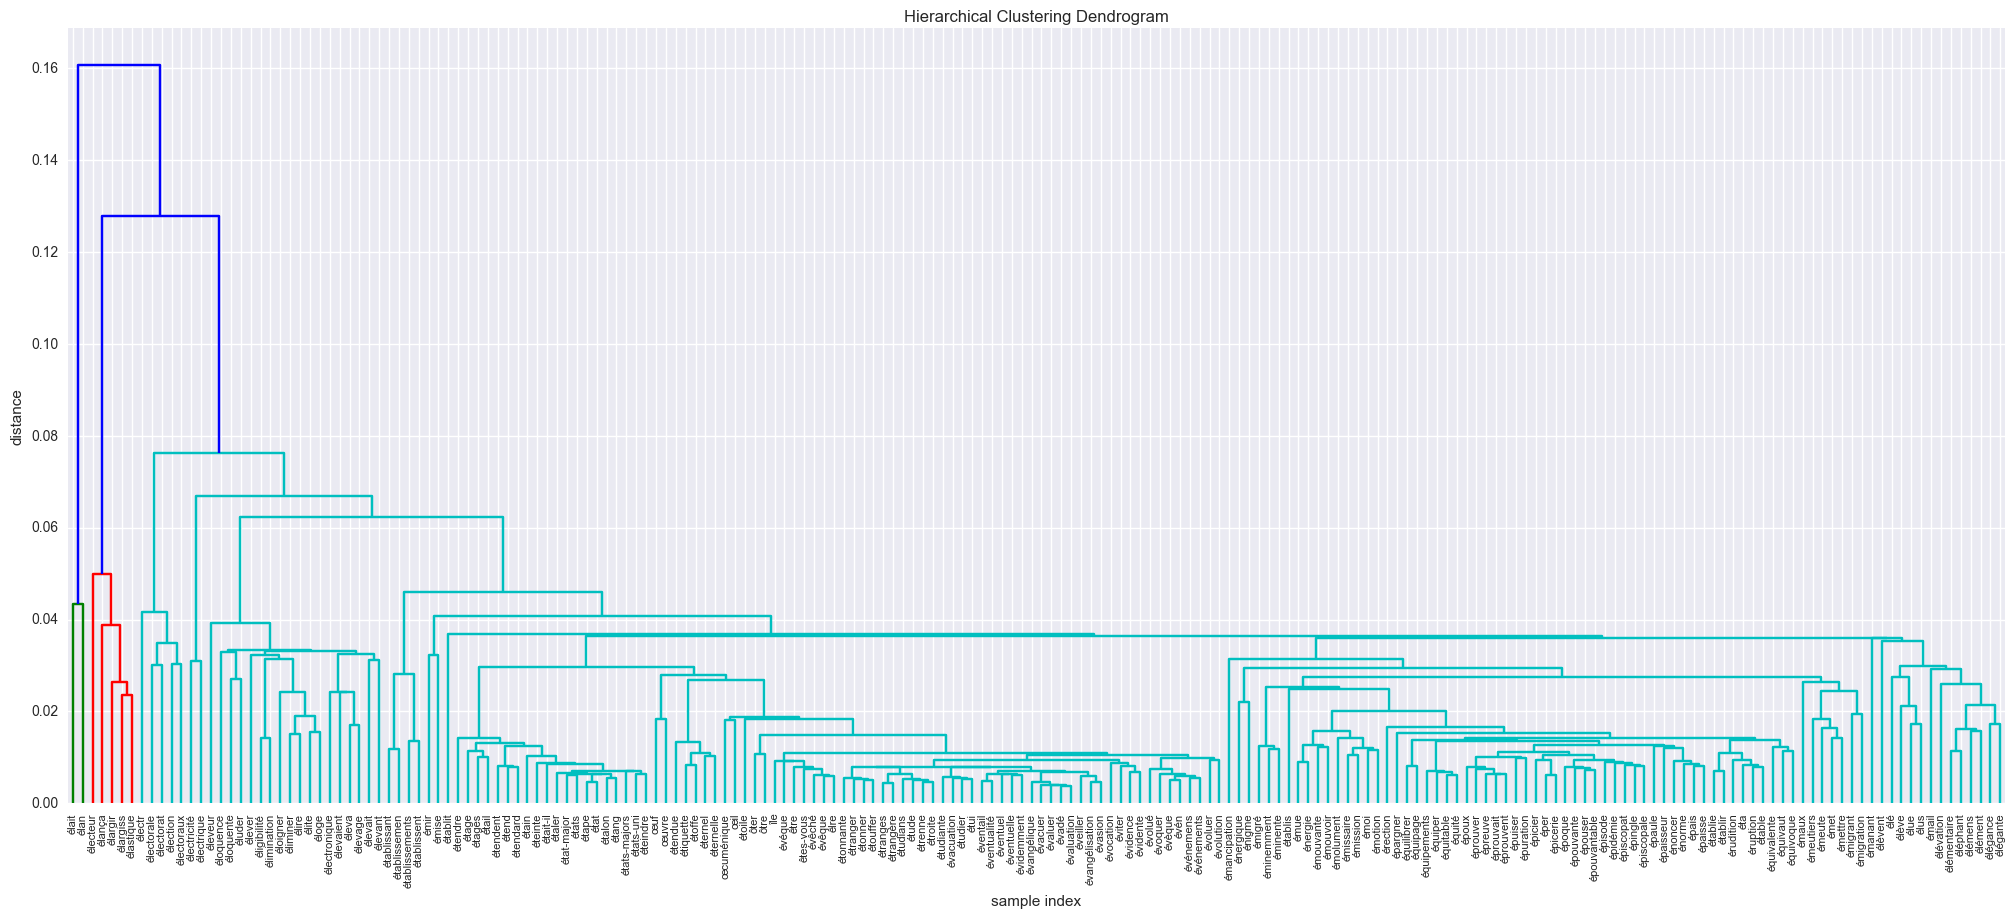

In [36]:
Z = hac.linkage(fullYearNorm, 'single', 'correlation')

# Plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    labels=fullYearNorm.columns.values# font size for the x axis labels
)
plt.show()

# Finding words with frequencies

We will try to find words that have a yearly cycle.

In [25]:
wordMonth = pd.read_csv('Data/3kplusWordMonth.csv',index_col=0)
wordMonth.shape

(2351, 43051)

In [26]:
wordNorm = wordMonth.divide(wordMonth.sum(axis=1).values,axis=0)
wordNorm.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-02-01,0.0,0.0,0.000000,0.0,0.000076,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,0.0,0.000159,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import scipy.fftpack as sc

In [50]:
noel = wordNorm['noële'].values[1500:1950]

In [32]:
wordMonth.index = pd.to_datetime(wordMonth.index)
yearIndex = wordNorm.index

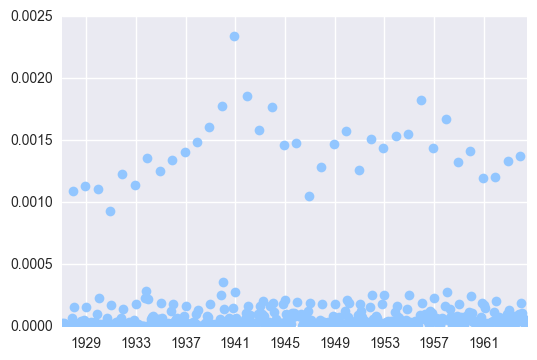

In [51]:
plt.plot_date(yearIndex[1500:1950],noel)

/Users/thomas/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


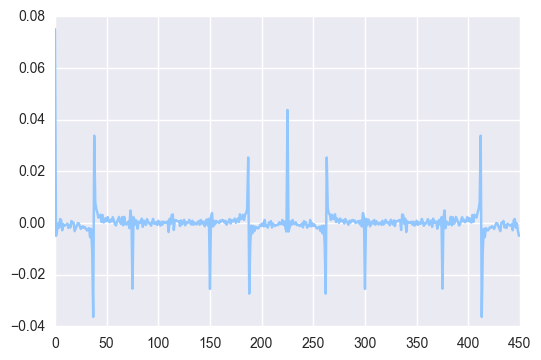

In [52]:
plt.plot(sc.fft(noel))

In [93]:
wordInterpolate = wordNorm.interpolate(method='time',axis=0,limit=8)

In [62]:
wordRolling = wordNorm.rolling(window=3).mean()

In [54]:
fftData = wordNorm.apply(sc.fft,axis=0)

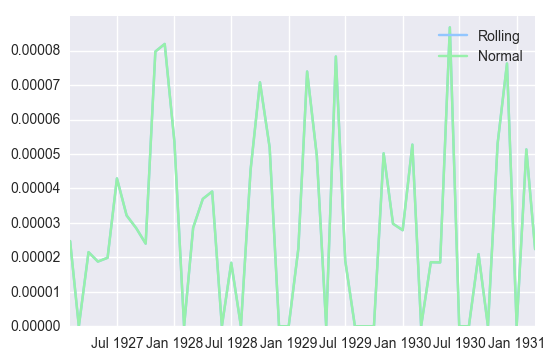

In [94]:
plt.plot_date(yearIndex[1500:1550],wordInterpolate['évoquer'].values[1500:1550],'-',label='Rolling')
plt.plot_date(yearIndex[1500:1550],wordInterpolate['évoquer'].values[1500:1550],'-',label='Normal')
plt.legend()

In [75]:
periodicWords = (fftData[fftData > 0.1 + 0.1j].sum(axis=0).values >0.1)

In [77]:
wordNorm.columns[periodicWords]

Index(['abandonner', 'abbé', 'abonn', 'abonnements', 'abord', 'aboutir',
       'abri', 'absence', 'absolue', 'absolument',
       ...
       'évolution', 'évoquer', 'évén', 'événemen', 'événements', 'évêque',
       'être', 'île', 'œil', 'œuvre'],
      dtype='object', length=3598)

In [90]:
wordInterpolate.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarg,aarhus,...,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre,——,———,„„„
1798-02-01,0.0,0.0,0.000000,0.0,0.000076,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-03-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-04-01,0.0,0.0,0.000159,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-05-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798-06-01,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Estimation of the long tail

In [7]:
longTail = pd.read_csv('Data/3kPluswordPerYear.csv',index_col=0)
print('Shape : ',longTail.shape)
longTail.head()

Shape :  (197, 45149)


,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarcorp,aarg,...,œcuménique,œcuménisme,œdipe,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre
1798-01-01,0.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0
1799-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,6.0
1804-01-01,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,18.0
1805-01-01,0.0,4.0,9.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,16.0
1806-01-01,3.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,26.0


In [55]:
minValues = longTail.loc[longTail.index[170]][longTail.loc[longTail.index[170]] > 0].sort_values(ascending=False).values
minValuesYear0 = longTail.loc[longTail.index[0]][longTail.loc[longTail.index[0]] > 0].sort_values(ascending=False)

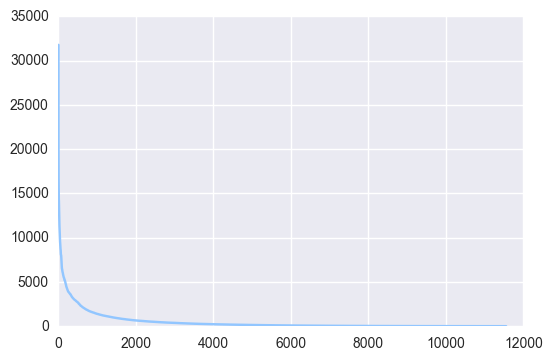

In [22]:
plt.plot(minValues)

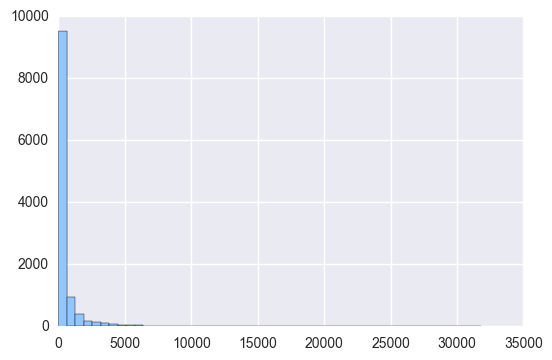

In [80]:
_=plt.hist(minValues,bins=50)

In [113]:
remainingDistrib = np.array([])

for i in longTail.index:
    distrib = longTail.loc[i][longTail.loc[i] > 0].sort_values(ascending=False)
    pctchange = distrib.pct_change()
    onlyVal = pctchange[pctchange<0]
    prob = cdf0[np.where(basePctChange==onlyVal.values[-1])]
    remainingDistrib = np.append(remainingDistrib,1-prob)

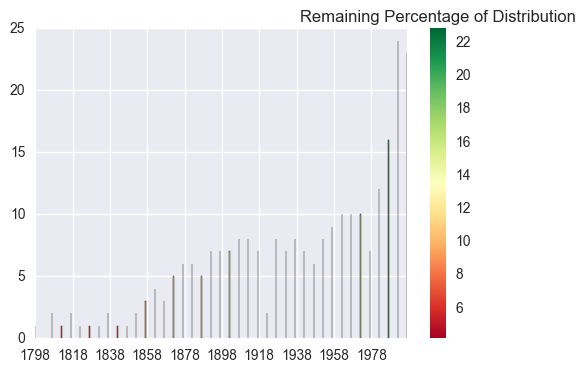

In [142]:
from matplotlib import cm

# Set up colors : red to green
y = remainingDistrib[np.arange(0,len(minValuesPerYear),5)]*100
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y,cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Remaining Percentage of Distribution")

minValuesPerYear = longTail[longTail>0].min(axis=1)
minValuesPerYear.index = pd.to_datetime(minValuesPerYear.index)
plt.bar(minValuesPerYear.index.values[np.arange(0,len(minValuesPerYear),5)],
        minValuesPerYear.values[np.arange(0,len(minValuesPerYear),5)],
        color=colors,width=50)
plt.show()

In [148]:
s1 = pd.Series(remainingDistrib)
s2 = pd.Series(minValuesPerYear.index.values)
s3 = pd.Series(minValuesPerYear.values)
df = pd.concat([s1,s2,s3],axis=1)
df.columns = ['Remaining distrib','Date','Minimum Num Words']
df.to_csv('Data/minNumWordsYear.csv')

In [86]:
import powerlaw
data = minValues # data can be list or numpy array
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)

Calculating best minimal value for power law fit
/Users/thomas/anaconda3/lib/python3.5/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.90110330893
2663.0


In [37]:
powerlaw.cdf(data=minValues)

(array([  1.00000000e+01,   1.10000000e+01,   1.20000000e+01, ...,
          1.86220000e+04,   2.06490000e+04,   3.17710000e+04]),
 array([ 0.        ,  0.02302233,  0.06240263, ...,  0.99974035,
         0.9998269 ,  0.99991345]))

In [38]:
import scipy
import scipy.stats

In [42]:
dist = getattr(scipy.stats, 'powerlaw')
param = dist.fit(minValues)
pdf_fitted = dist.pdf(np.arange(0,len(minValues)), *param[:-2], loc=param[-2], scale=param[-1]) * len(minValues)
plt.plot(pdf_fitted, label=dist_name)

NameError: name 'dist_name' is not defined

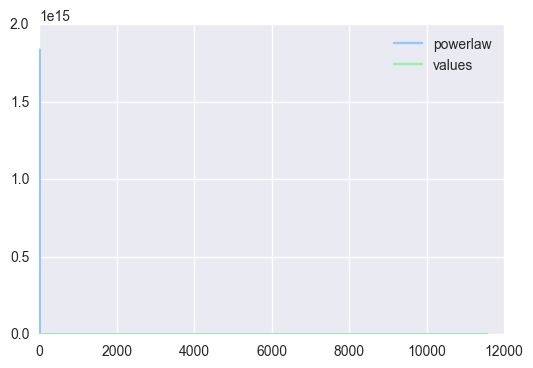

In [48]:
plt.plot(np.arange(0,len(minValues)),pdf_fitted, label='powerlaw')
plt.plot(np.arange(0,len(minValues)),minValues,label='values')
plt.legend()

In [40]:
np.arange(0,len(minValues))

array([    0,     1,     2, ..., 11551, 11552, 11553])

In [50]:
pdf_fitted

array([ 0.        ,  0.        ,  0.        , ...,  0.10938184,
        0.10937366,  0.10936549])

In [51]:
dist = getattr(scipy.stats, 'powerlaw')
dist.pdf()

In [52]:
import matplotlib.pyplot as plt

In [54]:
mean, var, skew, kurt = powerlaw.pdf(2, moments='mvsk')

AttributeError: module 'powerlaw' has no attribute 'stats'

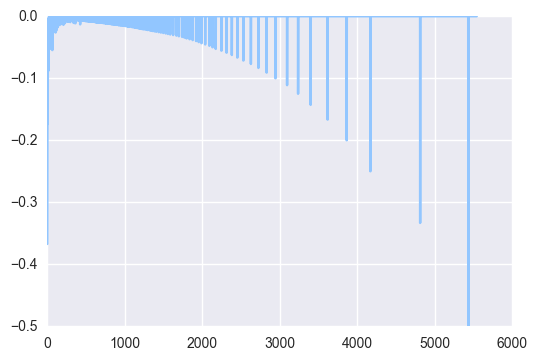

In [75]:
basePctChange = minValuesYear0.pct_change().values
plt.plot(minValuesYear0.pct_change().values)

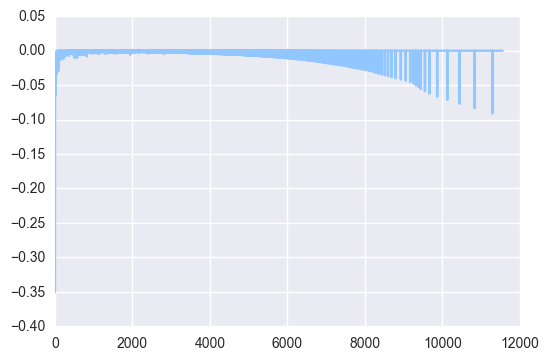

In [79]:
plt.plot(pd.Series(minValues).pct_change().values)

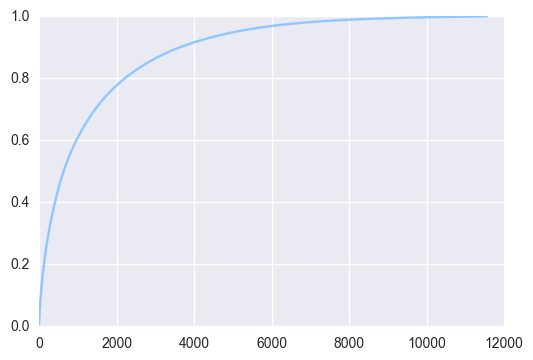

In [66]:
cdf0 = np.cumsum(minValues/np.sum(minValues))
plt.plot(cdf0)

In [70]:
pctchange = pd.Series(minValues).pct_change()
onlyVal = pctchange[pctchange<0]

In [74]:
lastPctChange = onlyVal.values[-1]

In [77]:
cdf0[np.where(basePctChange==lastPctChange)]

array([ 0.85252448])

In [104]:
np.arange(0,10)[np.arange(0,10,2)]

array([0, 2, 4, 6, 8])